In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
plt.style.use('seaborn')

In [7]:
filename = 'data/tr_eikon_eod_data.csv'

In [8]:
data = pd.read_csv(filename, index_col=0, parse_dates=True)

In [9]:
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.3500,NaN,NaN
2010-01-04,30.572827,30.950,20.880,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.0000,47.71,109.800
2010-01-05,30.625684,30.960,20.870,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.6500,48.17,109.700
2010-01-06,30.138541,30.770,20.800,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.5000,49.34,111.510
2010-01-07,30.082827,30.452,20.600,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.9000,49.10,110.820
2010-01-08,30.282827,30.660,20.830,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.1000,49.84,111.370
2010-01-11,30.015684,30.270,20.950,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.6000,50.17,112.850
2010-01-12,29.674256,30.070,20.608,127.350,167.82,113.66,1136.22,18.25,1.4494,1127.3000,48.35,110.490
2010-01-13,30.092827,30.350,20.960,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.4000,48.86,111.540


In [10]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
INTC.O    2138 non-null float64
AMZN.O    2138 non-null float64
GS.N      2138 non-null float64
SPY       2138 non-null float64
.SPX      2138 non-null float64
.VIX      2138 non-null float64
EUR=      2216 non-null float64
XAU=      2211 non-null float64
GDX       2138 non-null float64
GLD       2138 non-null float64
dtypes: float64(12)
memory usage: 225.1 KB


In [14]:
data.diff().mean()

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

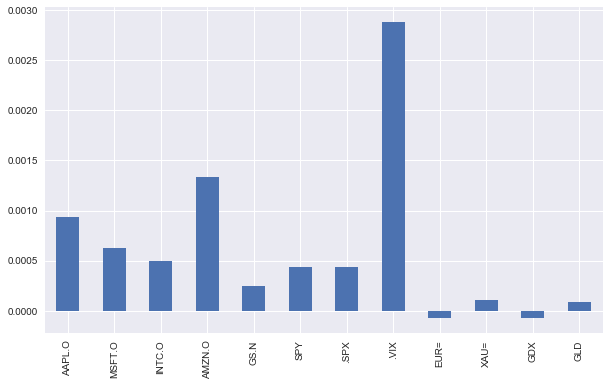

In [16]:
data.pct_change().mean().plot(kind='bar', figsize=(10,6))

In [17]:
rets = np.log(data/data.shift(1))

In [18]:
rets.head.round(3)

AttributeError: 'function' object has no attribute 'round'

In [19]:
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


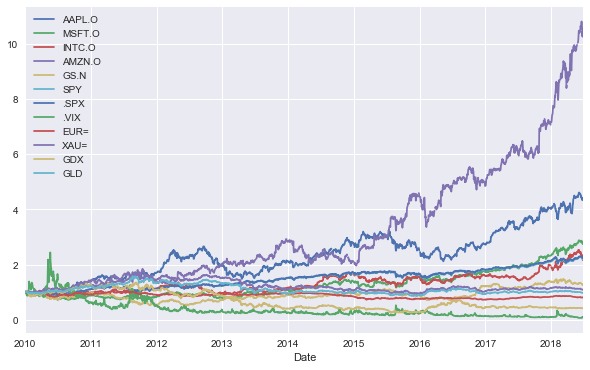

In [20]:
rets.cumsum().apply(np.exp).plot(figsize=(10,6))

In [21]:
sym = 'AAPL.O'
data = pd.DataFrame(data[sym]).dropna()
data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


In [22]:
window = 20
data['min'] = data[sym].rolling(window=window).min()

In [25]:
data['min'].dropna()

Date
2010-02-01     27.437544
2010-02-02     27.437544
2010-02-03     27.437544
2010-02-04     27.435687
2010-02-05     27.435687
2010-02-08     27.435687
2010-02-09     27.435687
2010-02-10     27.435687
2010-02-11     27.435687
2010-02-12     27.435687
2010-02-16     27.435687
2010-02-17     27.435687
2010-02-18     27.435687
2010-02-19     27.435687
2010-02-22     27.435687
2010-02-23     27.435687
2010-02-24     27.435687
2010-02-25     27.435687
2010-02-26     27.435687
2010-03-01     27.435687
2010-03-02     27.435687
2010-03-03     27.435687
2010-03-04     27.435687
2010-03-05     27.731401
2010-03-08     27.731401
2010-03-09     27.873686
2010-03-10     27.873686
2010-03-11     28.151258
2010-03-12     28.151258
2010-03-15     28.151258
                 ...    
2018-05-18    162.320000
2018-05-21    162.320000
2018-05-22    162.320000
2018-05-23    162.320000
2018-05-24    162.320000
2018-05-25    165.260000
2018-05-29    169.100000
2018-05-30    176.570000
2018-05-31    176.89

In [26]:
data['SMA1'] = data[sym].rolling(window=200).mean()

In [27]:
data

,AAPL.O,min,SMA1
Date,,,
2010-01-04,30.572827,NaN,NaN
2010-01-05,30.625684,NaN,NaN
2010-01-06,30.138541,NaN,NaN
2010-01-07,30.082827,NaN,NaN
2010-01-08,30.282827,NaN,NaN
2010-01-11,30.015684,NaN,NaN
2010-01-12,29.674256,NaN,NaN
2010-01-13,30.092827,NaN,NaN
2010-01-14,29.918542,NaN,NaN


In [39]:
tick = pd.read_csv('data/fxcm_eur_usd_tick_data.csv', parse_dates=['Unnamed: 0'])

In [36]:
tick

,Unnamed: 0,Bid,Ask,Mid
0,2018-06-29 00:00:00.082,1.15635,1.15636,1.156355
1,2018-06-29 00:00:00.106,1.15634,1.15636,1.156350
2,2018-06-29 00:00:00.114,1.15634,1.15635,1.156345
3,2018-06-29 00:00:00.121,1.15634,1.15634,1.156340
4,2018-06-29 00:00:00.151,1.15632,1.15634,1.156330
5,2018-06-29 00:00:00.158,1.15632,1.15633,1.156325
6,2018-06-29 00:00:00.170,1.15632,1.15634,1.156330
7,2018-06-29 00:00:00.176,1.15633,1.15635,1.156340
8,2018-06-29 00:00:00.241,1.15633,1.15634,1.156335
9,2018-06-29 00:00:00.463,1.15633,1.15635,1.156340


In [40]:
tick['Mid'] = tick.mean(axis=1)

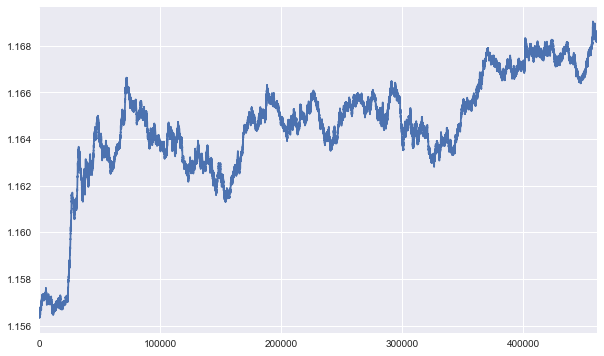

In [41]:
tick['Mid'].plot(figsize=(10,6))

In [42]:
tick_resam = tick.resample(rule='5min', label='right').last()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [43]:
tick

,Unnamed: 0,Bid,Ask,Mid
0,2018-06-29 00:00:00.082,1.15635,1.15636,1.156355
1,2018-06-29 00:00:00.106,1.15634,1.15636,1.156350
2,2018-06-29 00:00:00.114,1.15634,1.15635,1.156345
3,2018-06-29 00:00:00.121,1.15634,1.15634,1.156340
4,2018-06-29 00:00:00.151,1.15632,1.15634,1.156330
5,2018-06-29 00:00:00.158,1.15632,1.15633,1.156325
6,2018-06-29 00:00:00.170,1.15632,1.15634,1.156330
7,2018-06-29 00:00:00.176,1.15633,1.15635,1.156340
8,2018-06-29 00:00:00.241,1.15633,1.15634,1.156335
9,2018-06-29 00:00:00.463,1.15633,1.15635,1.156340


In [44]:
M = 100

In [50]:
I = 50000
r = 0.06
T = 1.0
sigma = 0.2

In [54]:
def mcs_simulation_py(p):
    M, I = p
    dt = T/M
    S = np.zeros((M+1, I))
    S[0] = 50
    rn = np.random.standard_normal(S.shape)
    for t in range(1, M+1):
        for i in range(I):
            S[t, i] = S[t-1,i] * math.exp((r - sigma ** 2 / 2) * dt + sigma * math.sqrt(dt) * rn[t,i])
    return S

In [55]:
%time S = mcs_simulation_py((M,I))

Wall time: 16.3 s


In [56]:
S[-1].mean()

53.084902885643544

In [57]:
def f(x):
    return np.sin(x) + 0.5 * x

In [58]:
import numpy.random as npr

In [60]:
npr.seed(100)
np.set_printoptions(precision=4)

In [61]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [62]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0,10, sample_size)
rn3 = npr.sample(size=sample_size)
a = [0,25,50,75,100]
rn4 = npr.choice(a, size=sample_size)

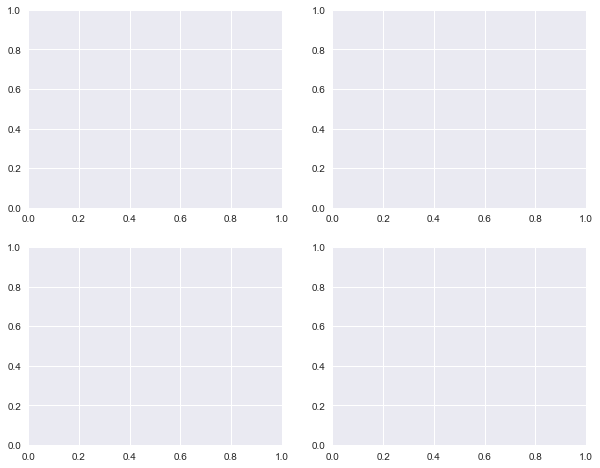

In [65]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

In [64]:
ax1.hist(rn1,bins=25, stacked=True)

([array([19., 25., 25., 20., 19., 23., 20., 24., 17., 23., 23., 18., 29.,
         20., 17., 19., 17., 19., 12., 22., 21., 17., 14., 22., 15.]),
  array([36., 47., 51., 38., 41., 40., 41., 41., 38., 37., 38., 39., 60.,
         38., 43., 35., 35., 43., 33., 40., 42., 31., 29., 43., 41.]),
  array([52., 67., 76., 60., 65., 64., 59., 58., 59., 51., 60., 58., 79.,
         57., 68., 47., 53., 71., 48., 58., 63., 51., 45., 66., 65.])],
 array([4.8676e-04, 4.0446e-02, 8.0406e-02, 1.2037e-01, 1.6033e-01,
        2.0029e-01, 2.4024e-01, 2.8020e-01, 3.2016e-01, 3.6012e-01,
        4.0008e-01, 4.4004e-01, 4.8000e-01, 5.1996e-01, 5.5992e-01,
        5.9988e-01, 6.3984e-01, 6.7980e-01, 7.1976e-01, 7.5972e-01,
        7.9968e-01, 8.3964e-01, 8.7960e-01, 9.1956e-01, 9.5952e-01,
        9.9948e-01]),
 <a list of 3 Lists of Patches objects>)

In [67]:
S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000
ST1 = S0 * np.exp((r-0.5*sigma **2) * T + sigma * math.sqrt(T) * npr.standard_normal(I))

Text(0, 0.5, 'frequency')

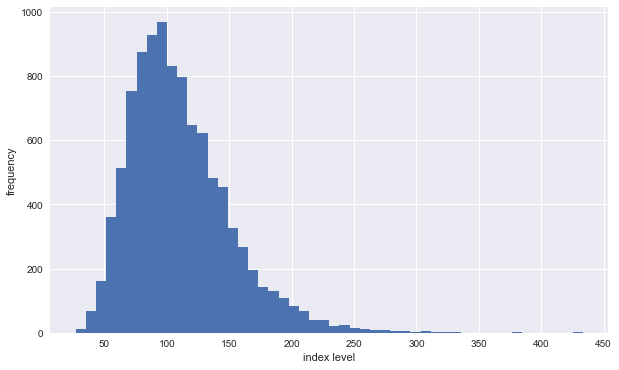

In [68]:
plt.figure(figsize=(10,6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [69]:
#### Simulating index levels dynaminally in Black Scholes setup
I = 10000
M = 50
dt = T/ M
S0 = 100
S = np.zeros((M+1, I))
S[0] = S0
for t in range(1, M+1):
    S[t] = S[t-1] * np.exp((r-0.5*sigma ** 2) * dt + sigma + math.sqrt(dt) * npr.standard_normal(I))

Text(0, 0.5, 'frequency')

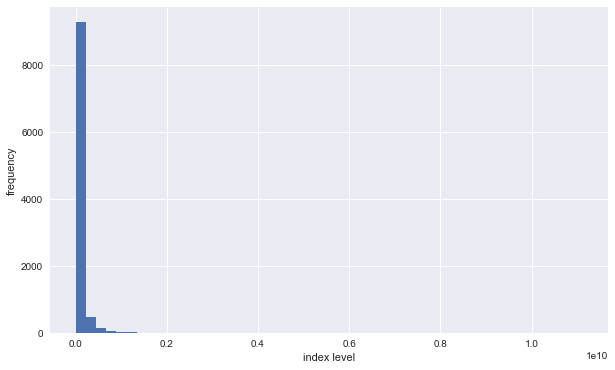

In [70]:
plt.figure(figsize=(10,6))
plt.hist(S[-1], bins = 50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [72]:
npr.print_statistics(S[-1])

AttributeError: module 'numpy.random' has no attribute 'print_statistics'